    Sprawozdanie 5.          EAIiIB, Informatyka, Metody Numeryczne          Jakub Zyngier

In [1]:
import numpy as np
from numpy import linalg as nl
import numpy.linalg as la
import math
import time
import scipy.linalg
from copy import copy, deepcopy
from scipy.sparse import csr_matrix
import scipy.sparse.linalg
import matplotlib.pyplot as plt

Zadanie 1.

In [2]:
A = np.array([[1.0,1.0], [1.0,1.0001]])
b1 = np.array([2,2.0001])
b2 = np.array([2,2])

x1 = (np.linalg.inv(A)).dot(b1)
print("Rozwiązanie dla b1 =",x1)
x2 = (np.linalg.inv(A)).dot(b2)
print("Rozwiązanie dla b2 =",x2)

print("\ncond(A) =",np.linalg.cond(A, p='fro'))

Rozwiązanie dla b1 = [1. 1.]
Rozwiązanie dla b2 = [2. 0.]

cond(A) = 40002.00010000441


Zmiana o małą wartość wektora b (wektora w prawej strony) wiąże się ze znaczącą zmianą rozwiązania.

Zadanie 2.

In [3]:
H = np.array([[1, 1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8], [1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9], [1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10], [1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11], [1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12],  [1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13], [1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13, 1/14], [1/8, 1/9, 1/10, 1/11, 1/12, 1/13, 1/14, 1/15]])

print(np.round(H,3))

uwarunkowanie_kolu=la.norm(H,1)*la.norm(la.inv(H),1)
uwarunkowanie_spek=la.norm(H,2)*la.norm(la.inv(H),2)
uwarunkowanie_wier=la.norm(H,np.inf)*la.norm(la.inv(H),np.inf)

print("\nUwarunkowania macierzy Hilberta:")
print("Norma kolumnowa: ", uwarunkowanie_kolu)
print("Norma spektralna: ", uwarunkowanie_spek)
print("Norma wierszowa: ", uwarunkowanie_wier)

[[1.    0.5   0.333 0.25  0.2   0.167 0.143 0.125]
 [0.5   0.333 0.25  0.2   0.167 0.143 0.125 0.111]
 [0.333 0.25  0.2   0.167 0.143 0.125 0.111 0.1  ]
 [0.25  0.2   0.167 0.143 0.125 0.111 0.1   0.091]
 [0.2   0.167 0.143 0.125 0.111 0.1   0.091 0.083]
 [0.167 0.143 0.125 0.111 0.1   0.091 0.083 0.077]
 [0.143 0.125 0.111 0.1   0.091 0.083 0.077 0.071]
 [0.125 0.111 0.1   0.091 0.083 0.077 0.071 0.067]]

Uwarunkowania macierzy Hilberta:
Norma kolumnowa:  33872789110.107353
Norma spektralna:  15257574847.190956
Norma wierszowa:  33872789109.75766


Wartości uwarunkowania macierzy są duże, więc macierz jest źle uwarunkowana.
Wartości uwarunkowania macierzy korzystając z normy kolumnowej i wierszowej są podobne.

Zadanie 3.

In [4]:
powtorzenia = 1000

t = np.linspace(0, 1, 20, endpoint = False) 

b = []
for it in t:
    b.append(math.cos(4*it))
        
A = np.vander(t, increasing=True)
A=np.round(A,5)

print(A)

#metoda 1.
start_time = time.perf_counter()
for i in range(powtorzenia):
    x1 = np.linalg.solve(A, b)
time_x1 = (time.perf_counter() - start_time)/powtorzenia

print("\nCzas wykonania - metoda 1.:", time_x1)

#metoda 2.
start_time = time.perf_counter()
for i in range(powtorzenia):
    Q, R = np.linalg.qr(A)
    y = np.dot(Q.T, b)
    x2 = np.linalg.solve(R, y)
time_x2 = (time.perf_counter() - start_time)/powtorzenia

print("Czas wykonania - metoda 2.:", time_x2)

#metoda 3.
start_time = time.perf_counter()
for i in range(powtorzenia):
    x3 = np.linalg.lstsq(A, b)[0]
time_x3 = (time.perf_counter() - start_time)/powtorzenia

print("Czas wykonania - metoda 3.:", time_x3)


print("\nPorównanie wyników trzech metod (true - wyniki podobne; false - wyniki niepodobne)")
print("Metoda 1. i 2.:", np.allclose(x1, x2))
print("Metoda 2. i 3.:", np.allclose(x2, x3))
print("Metoda 1. i 3.:", np.allclose(x1, x3))


print("\n\n")
r1=b-A.dot(x1)
r2=b-A.dot(x2)
r3=b-A.dot(x3)

print(r1)
print(r2)
print(r3)

[[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00]
 [1.0000e+00 5.0000e-02 2.5000e-03 1.3000e-04 1.0000e-05 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00]
 [1.0000e+00 1.0000e-01 1.0000e-02 1.0000e-03 1.0000e-04 1.0000e-05
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00]
 [1.0000e+00 1.5000e-01 2.2500e-02 3.3800e-03 5.1000e-04 8.0000e-05
  1.0000e-05 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00]
 [1.0000e+00 2.0000e-01 4.0000e-02 8.0000e-03 1.6000e-03 3.2000e-04
  6.0000e-05 1.0

C:\Users\Zyngi\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [5]:
print("||r1||=",la.norm(r1,1))
print("||r2||=",la.norm(r2,1))
print("||r3||=",la.norm(r3,1))

||r1||= 6.130165819406841e-14
||r2||= 9.535081058054118e-14
||r3||= 8.339509638410902e-14


Zadanie 4.

In [6]:
x = 500
y = 500

random_matrix = np.random.uniform(-1,1,size=(x,y))
random_matrix = random_matrix
lower = np.tril(random_matrix, -1)
upper = lower.transpose()
diag = np.zeros((x, y))
np.fill_diagonal(diag, 1)
A = lower+upper+diag

#Sprawdzamy czy maceirz A jest równa macierzy A transponowanej
if(np.allclose(A, A.transpose())):
    print("A = A^{T}")
else:
    print("A != A^{T}")

print(A)

tau = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]
x = []

for it in tau:
    print("\nDla tau =", it)
    tmp_A = deepcopy(A)
    tmp_A[abs(lower+upper)>it] = 0
    #print(tmp_A)
    print("cond(a) =",np.linalg.cond(tmp_A, p='fro'))
    x.append(np.linalg.cond(tmp_A, p='fro'))

A = A^{T}
[[ 1.          0.06244946 -0.9167953  ... -0.27447504  0.05423337
  -0.5706917 ]
 [ 0.06244946  1.          0.13760364 ...  0.77212649  0.9316794
   0.45047376]
 [-0.9167953   0.13760364  1.         ... -0.43658528  0.08440905
   0.38319372]
 ...
 [-0.27447504  0.77212649 -0.43658528 ...  1.          0.50275419
  -0.84721925]
 [ 0.05423337  0.9316794   0.08440905 ...  0.50275419  1.
  -0.73763562]
 [-0.5706917   0.45047376  0.38319372 ... -0.84721925 -0.73763562
   1.        ]]

Dla tau = 0.01
cond(a) = 500.180046152825

Dla tau = 0.05
cond(a) = 522.0669649811923

Dla tau = 0.1
cond(a) = 805.1371108020624

Dla tau = 0.2
cond(a) = 15907.771059757215

Dla tau = 0.5
cond(a) = 22954.361966029428

Dla tau = 0.75
cond(a) = 14843.78008315917


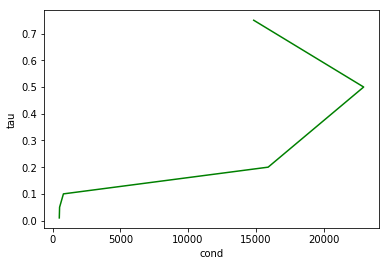

In [7]:
plt.plot(x, tau, color='g')
plt.xlabel('cond')
plt.ylabel('tau')
plt.show()

In [8]:
b = np.random.uniform(-1,1,size=(500,1))

spos_1 = []
spos_2 = []
spos_3 = []
cond_1 = []
cond_2 = []
cond_3 = []

for it in tau:
    print("\n\n####################")
    print("Dla tau =", it)
    
    #Sposób 1 
    tmp_A = deepcopy(A)
    tmp_A[abs(lower+upper)>it] = 0

    t0 = time.perf_counter ()
    x_1 = np.round(np.linalg.solve(tmp_A, b),2)
    t1 = time.perf_counter ()
    spos_1.append(t1-t0)
        
    print("\nsolve")
    print(x_1)
    
    #Sposób 2
    tmp_A = deepcopy(A)
    tmp_A[abs(lower+upper)>it] = 0
    
    t0 = time.perf_counter ()
    tmp_A = csr_matrix(tmp_A)
    x_2 = scipy.sparse.linalg.bicg(tmp_A, b)
    t1 = time.perf_counter ()
    spos_2.append(t1-t0)

    print("\nbicg")
    print(np.round(x_2[0],2))

    #Sposób 3
    tmp_A = deepcopy(A)
    tmp_A[abs(lower+upper)>it] = 0
    
    t0 = time.perf_counter ()
    tmp_A = csr_matrix(tmp_A)
    x_3 = scipy.sparse.linalg.gmres(tmp_A, b)
    t1 = time.perf_counter ()
    spos_3.append(t1-t0)
    
    print("\ngmres")
    print(np.round(x_3[0],2))

print("\n\n\n")
print("Czasy wykonania sposobem 1.:\n",spos_1)
print("Czasy wykonania sposobem 2.:\n",spos_2)
print("Czasy wykonania sposobem 3.:\n",spos_3)



####################
Dla tau = 0.01

solve
[[-0.6 ]
 [ 0.25]
 [-0.9 ]
 [-0.07]
 [ 0.7 ]
 [-0.92]
 [-0.09]
 [-0.05]
 [ 0.74]
 [-0.52]
 [ 0.5 ]
 [-0.44]
 [ 0.26]
 [ 0.9 ]
 [-0.66]
 [ 0.28]
 [ 0.36]
 [ 0.17]
 [-0.65]
 [ 0.78]
 [-0.49]
 [ 0.5 ]
 [ 0.64]
 [-0.08]
 [ 0.39]
 [ 0.5 ]
 [ 0.58]
 [ 0.15]
 [-0.37]
 [ 0.7 ]
 [ 0.38]
 [-0.76]
 [ 0.9 ]
 [-0.32]
 [-0.39]
 [-0.56]
 [-0.18]
 [-0.04]
 [ 0.11]
 [ 0.78]
 [ 0.76]
 [-0.94]
 [-0.89]
 [-0.31]
 [-0.98]
 [ 0.46]
 [-0.4 ]
 [ 0.02]
 [-0.11]
 [ 0.95]
 [ 0.22]
 [-0.05]
 [ 0.8 ]
 [-0.58]
 [-0.75]
 [ 0.13]
 [-0.65]
 [ 0.8 ]
 [ 0.6 ]
 [-0.51]
 [-0.52]
 [ 0.05]
 [ 0.68]
 [ 0.56]
 [ 0.78]
 [ 0.23]
 [-0.73]
 [ 0.49]
 [-0.7 ]
 [ 0.98]
 [ 0.95]
 [ 0.6 ]
 [ 0.57]
 [ 0.14]
 [-0.41]
 [ 0.03]
 [-0.92]
 [-0.21]
 [ 0.57]
 [-0.25]
 [ 0.95]
 [-0.85]
 [ 0.45]
 [ 0.42]
 [ 0.34]
 [ 0.37]
 [ 0.39]
 [-0.06]
 [-0.08]
 [ 0.47]
 [-0.85]
 [-0.83]
 [ 0.05]
 [ 0.5 ]
 [-0.17]
 [ 0.94]
 [-0.61]
 [-0.91]
 [ 0.7 ]
 [-0.59]
 [-0.94]
 [ 0.59]
 [-0.88]
 [-0.05]
 [ 0.48]
 [ 0.61]
 

bicg
[-1.03  0.57 -1.12  0.62  0.54 -1.12  0.09  0.07  0.02 -0.92  1.04 -0.12
  0.02  1.79 -0.63  0.3   0.77  1.39 -0.88  1.23 -0.07 -0.07  0.84 -0.17
  0.81  0.72  1.28  0.03 -0.05  0.26  0.11 -1.18  0.64 -0.78 -0.45  0.11
 -0.21 -0.25  0.58  0.29  1.24 -1.64 -1.63 -0.73 -0.77  0.26 -0.9  -0.75
 -0.12  0.81 -0.19 -0.13  1.21 -0.5  -1.2   0.24 -1.46  0.98  0.92 -1.
 -0.34  0.5   0.76  0.98  0.57 -0.18 -0.89  1.11 -1.34  1.41  0.81  0.37
  0.77  0.72 -0.09  0.67 -0.83  0.7   0.51 -0.8   1.78 -1.5   1.07  0.32
  0.85  0.63  0.28 -0.69  0.24  0.71 -1.52 -1.24  0.25  0.66 -0.09  0.86
 -0.96 -0.4   0.78 -0.8  -1.68  0.47 -0.83  0.9   0.2   1.66 -1.07 -0.88
  0.86 -0.36 -1.51  0.46 -1.04 -0.8   1.02  0.91 -2.15  0.83  0.49 -0.43
  1.21  1.75  1.23 -0.05  1.45  1.38  0.51 -0.2   0.51 -0.56 -0.56 -0.82
 -1.26  0.14 -1.09 -0.12 -0.02 -0.55 -0.1   1.71 -0.25 -0.5   0.33  0.14
 -0.38 -0.97 -0.12  0.78  0.82  1.48  1.05 -1.02  0.58 -0.25 -0.44 -0.86
  0.19 -1.03  0.27  1.38  1.3  -1.34 -0.75 -0.35


bicg
[ 1.463e+01  7.000e+00  2.910e+00 -6.610e+00 -1.600e-01 -8.740e+00
  5.460e+00 -2.663e+01 -8.040e+00 -2.010e+00 -1.923e+01 -1.420e+01
 -1.583e+01 -8.510e+00 -6.300e-01 -5.720e+00 -3.990e+00  1.852e+01
 -5.110e+00 -1.190e+00 -1.450e+00 -9.100e-01  1.560e+00 -2.890e+00
  4.700e-01  7.820e+00  8.320e+00 -3.590e+00 -6.730e+00  1.704e+01
  1.806e+01  9.020e+00  5.560e+00  9.620e+00 -4.140e+00 -1.451e+01
  1.610e+01  1.016e+01  6.060e+00 -7.420e+00  5.040e+00  1.325e+01
 -1.185e+01  2.300e+00  4.250e+00 -1.780e+01 -1.030e+00  2.080e+00
 -1.970e+00  1.281e+01 -2.670e+00  5.850e+00 -1.747e+01  7.550e+00
  1.172e+01 -1.222e+01 -2.623e+01  2.920e+00  6.400e-01 -3.230e+00
 -9.270e+00  4.340e+00  8.990e+00  7.290e+00  6.520e+00  1.720e+00
 -1.497e+01  2.150e+00  6.520e+00 -3.980e+00 -1.016e+01 -1.840e+00
 -8.440e+00 -2.030e+00  2.850e+00  2.155e+01  4.870e+00  4.910e+00
  9.300e+00  7.430e+00  4.200e-01  1.290e+00  5.630e+00 -6.160e+00
 -3.090e+00  4.270e+00  6.500e+00 -8.910e+00  7.100e-01 


bicg
[ 4.380e+00  3.540e+00  5.740e+00 -2.200e-01 -4.650e+00 -1.830e+00
  5.210e+00  8.800e-01  8.200e-01  6.140e+00 -5.190e+00  9.600e-01
 -3.370e+00  3.180e+00  4.450e+00 -3.460e+00 -8.130e+00  1.750e+00
  2.710e+00 -6.630e+00  1.540e+00 -4.620e+00 -1.060e+00  6.320e+00
  1.090e+00 -8.300e+00  5.100e-01 -3.000e-01 -1.630e+00 -1.660e+00
 -6.240e+00 -1.920e+00  5.430e+00  4.600e-01  2.700e-01  4.000e-02
  1.005e+01 -7.540e+00  6.360e+00 -4.400e-01  5.990e+00 -1.000e-01
 -1.000e-02 -1.040e+00 -6.210e+00 -5.090e+00  6.050e+00 -1.200e-01
 -2.700e-01  1.720e+00  4.770e+00  3.760e+00  2.040e+00  2.130e+00
 -3.330e+00 -6.240e+00 -6.800e-01 -3.380e+00  4.720e+00 -1.592e+01
  5.300e-01  6.940e+00 -5.490e+00 -4.460e+00  1.142e+01 -6.410e+00
 -1.320e+00 -7.010e+00 -6.000e-01  5.180e+00 -3.430e+00  5.570e+00
  7.810e+00  9.600e-01 -1.820e+00 -1.240e+00 -2.160e+00 -2.330e+00
 -3.120e+00 -6.930e+00 -8.460e+00 -4.250e+00  4.950e+00 -1.850e+00
 -1.210e+00 -2.350e+00 -2.330e+00  3.770e+00  2.760e+00 


bicg
[ 1.120e+00 -1.760e+00 -6.030e+00  2.380e+00 -7.900e-01 -1.630e+00
 -4.340e+00 -1.900e-01 -2.350e+00  1.100e+00 -1.970e+00  4.840e+00
 -3.050e+00 -2.410e+00  2.800e+00 -3.730e+00  2.870e+00  4.440e+00
  1.900e-01 -1.450e+00  4.540e+00  4.900e-01 -4.450e+00  2.110e+00
  1.620e+00 -2.120e+00 -3.970e+00  3.010e+00 -4.130e+00 -1.450e+00
 -9.000e-02  1.390e+00 -3.870e+00  1.330e+00 -8.100e-01 -2.680e+00
  4.500e+00  2.160e+00 -3.870e+00 -2.850e+00  2.200e+00 -1.210e+00
  4.000e-01  7.230e+00  1.480e+00 -4.600e-01  2.010e+00 -8.900e-01
 -1.670e+00  1.170e+00 -1.580e+00  3.790e+00 -9.600e-01 -3.640e+00
 -4.130e+00 -5.300e-01  2.530e+00  5.410e+00 -1.800e-01 -3.660e+00
 -1.950e+00 -5.700e+00 -1.790e+00  5.110e+00  3.490e+00 -4.560e+00
 -5.900e-01  3.410e+00 -6.310e+00 -1.100e-01  2.760e+00 -1.200e+00
  7.450e+00 -1.500e+00  1.090e+00  3.130e+00  2.490e+00 -4.660e+00
 -5.100e-01  1.890e+00 -9.800e-01  2.450e+00  1.640e+00  9.100e-01
  5.700e-01 -3.820e+00  3.600e+00 -2.880e+00 -3.750e+00 

Zadanie 5.

In [9]:
def gauss(A, b, x, MAX_ITERACJI):
    for it in range(0, MAX_ITERACJI):
        for i in range(0, len(x)):
            suma_kontrolna=0
            suma=0
            for j in range(0, len(A)):
                if(j!=i):
                    suma += A[i][j]*x[j]
            tmp_x = (b[i] - suma)/A[i][i]
            if((x[i]<0 and tmp_x>0 or x[i]>0 and tmp_x<0) and zbieznosc(A) != True):
                print("Przerwanie funkcji, brak zbieżności!")
                return None;
            x[i] = (b[i] - suma)/A[i][i]
        print("Dla",it,". wynikiem jest wektor x:\n",x)
    
def zbieznosc(A):
    #Kryterium silnej dominacji w rzędach
    for i in range(0,len(A[0])):
        suma=0
        for j in range(0, len(A)):
            if(j!=i):
                suma+=abs(A[i][j])
            if(j==len(A)-1):
                if(abs(A[i][j]) <= suma):
                    return False
               
    #Kryterium silnej dominacji w kolumnach
    for j in range(0,len(A[0])):
        suma=0
        for i in range(0, len(A)):
            if(j!=i):
                suma+=abs(A[i][j])
            if(j==len(A)-1):
                if(abs(A[i][j]) <= suma):
                    return False
                    
    return True;

A = np.array([[27.0,6.0,-1.0], [6.0,15.0,-2.0], [1.0,1.0,54.0]])
b = np.array([85.0,72.0,110.0])
x = np.array([0.0,0.0,0.0])

gauss(A, b, x,10)
print("Wynik funkcji solve:")
print(np.linalg.solve(A, b))

A = np.array([[1.0,2.0,3.0], [2.0,1.0,3.0], [3.0,2.0,1.0]])
b = np.array([1.0,2.0,0.0])
x = np.array([0.0,0.0,0.0])
print("Czym więcej iteracji tym wynik jest dokładniejszy")

print("\n\n\n")

gauss(A, b, x,10)
print("\nWynik funkcji solve:")
print(np.linalg.solve(A, b))

Dla 0 . wynikiem jest wektor x:
 [3.14814815 3.54074074 1.91316872]
Dla 1 . wynikiem jest wektor x:
 [2.43217497 4.08221917 1.91640011]
Dla 2 . wynikiem jest wektor x:
 [2.31196611 4.13073357 1.91772778]
Dla 3 . wynikiem jest wektor x:
 [2.30123431 4.13520331 1.91784375]
Dla 4 . wynikiem jest wektor x:
 [2.30024533 4.13561437 1.91785445]
Dla 5 . wynikiem jest wektor x:
 [2.30015438 4.13565217 1.91785543]
Dla 6 . wynikiem jest wektor x:
 [2.30014601 4.13565565 1.91785552]
Dla 7 . wynikiem jest wektor x:
 [2.30014524 4.13565597 1.91785553]
Dla 8 . wynikiem jest wektor x:
 [2.30014517 4.135656   1.91785553]
Dla 9 . wynikiem jest wektor x:
 [2.30014517 4.135656   1.91785553]
Wynik funkcji solve:
[2.30014517 4.135656   1.91785553]
Czym więcej iteracji tym wynik jest dokładniejszy




Dla 0 . wynikiem jest wektor x:
 [ 1.  0. -3.]
Dla 1 . wynikiem jest wektor x:
 [ 10.  -9. -12.]
Dla 2 . wynikiem jest wektor x:
 [ 55. -72. -21.]
Przerwanie funkcji, brak zbieżności!

Wynik funkcji solve:
[ 0.